<a href="https://colab.research.google.com/github/ShreyaAN10/LearnDeepLearning/blob/main/MultiClassClassification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## Create toy dataset


torch.Size([200, 2]) torch.Size([200])


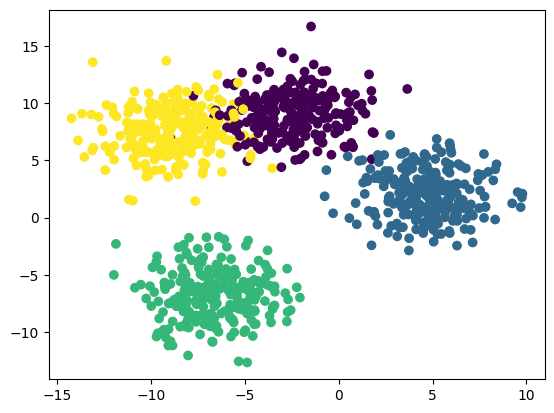

In [2]:
# set hyperparameters for make_blob
N_CLASSES = 4
N_FEATURES = 2
N_SAMPLES = 1000
RANDOM_SEED = 42

# create multiclass data
X_blob, y_blob = make_blobs(n_samples=N_SAMPLES,
                            n_features=N_FEATURES,
                            centers=N_CLASSES,
                            cluster_std=2,
                            random_state=RANDOM_SEED)

# convert data to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# len(X_train), len(y_train)
print(X_test.shape, y_test.shape)

# plot data
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)

## Create model

In [3]:
# make device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Create class and instantiate a model

In [4]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8) -> None:
    # practise writing docstrings
    """Initialises multi-class classification model

    Args:
        input_features (int): number of input feature to the model
        output_features (int): number of output classes
        hidden_units (int): number of hidden units between layers, default 8

    Returns:

    Raises:

    Example:

    """
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

# instantiate the class
model = BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)
print(model)

print(model.state_dict())

BlobModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)
OrderedDict([('layer_stack.0.weight', tensor([[-0.2472,  0.0098],
        [-0.3171, -0.1876],
        [ 0.5832, -0.0116],
        [-0.1300, -0.5898],
        [-0.5476,  0.3644],
        [ 0.3467, -0.1692],
        [-0.3698, -0.2026],
        [-0.5649, -0.3478]], device='cuda:0')), ('layer_stack.0.bias', tensor([ 0.0887,  0.2142,  0.0952,  0.0043, -0.1177,  0.5593, -0.5364, -0.1015],
       device='cuda:0')), ('layer_stack.2.weight', tensor([[ 0.0032, -0.1819,  0.2393, -0.1904,  0.0131, -0.1633,  0.0982,  0.0120],
        [-0.0342,  0.1539, -0.0993,  0.1498,  0.0667, -0.0903, -0.2574,  0.0282],
        [ 0.1815,  0.2804,  0.1263, -0.2485, -0.0084,  0.3185,  0.1279,  0.0460],
        [ 0.0207, -0.1342,  0.3081, -0.1040,  0.3205,  0.2510,  0

### Initlize loss and optimizer

In [5]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

def accuracy_fn(preds, actual):
  correct = torch.eq(preds, actual).sum().item()
  return (correct / len(preds)) * 100

### Put inputs on the target device

In [6]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

What do the model's logits look like?

In [7]:
with torch.inference_mode():
  model.eval()
  print(X_test.dtype)
  y_logits = model(X_test)

y_logits[:10]

torch.float32


tensor([[-0.6453, -0.3033,  0.4110,  0.5263],
        [-1.7039, -0.2732,  1.0634,  1.0804],
        [-0.5087, -0.0896,  0.0574,  0.4699],
        [-0.6323, -0.2672,  0.3902,  0.3862],
        [-0.8189, -0.2429,  0.4199,  0.4550],
        [-2.1792, -0.3196,  1.4357,  1.4610],
        [-0.2668, -0.1090, -0.0473,  0.2961],
        [-1.0495, -0.2403,  0.5516,  0.5715],
        [-0.8516, -0.0269,  0.3683,  0.9708],
        [-0.9378, -0.2268,  0.4760,  0.4927]], device='cuda:0')

to make sense of these outputs i.e convert logits into prediction probabilities, for multiclass classification, we use the `softmax output activation`

In [8]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[0.1175, 0.1654, 0.3379, 0.3792],
        [0.0268, 0.1121, 0.4269, 0.4342],
        [0.1440, 0.2190, 0.2537, 0.3832],
        [0.1252, 0.1803, 0.3480, 0.3466],
        [0.1020, 0.1814, 0.3520, 0.3646],
        [0.0121, 0.0777, 0.4493, 0.4609],
        [0.1933, 0.2264, 0.2408, 0.3395],
        [0.0754, 0.1693, 0.3739, 0.3814],
        [0.0778, 0.1775, 0.2635, 0.4813],
        [0.0883, 0.1797, 0.3629, 0.3691]], device='cuda:0')

If you notice, all rows sum up to 1. This implies, for each class, the model outputs a probability of prediction.

In order to derive the class/label with the highest probability, use the `argmax` function.

In [9]:
torch.max(y_pred_probs[0])

tensor(0.3792, device='cuda:0')

In [10]:
torch.argmax(y_pred_probs[0])

tensor(3, device='cuda:0')

This implies that the prediction is Class 3

In [11]:
# let's do this for all datapoints

torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

tensor([3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        2, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')

In [12]:
y_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

> logits (raw output of the model) -> pred probs (use `torch.softmax()`) -> pred_labels (use `torch.argmax()`)

In [13]:
def plot_convergence(epochs,
                     loss,
                     test_loss):
  plt.plot(epochs, torch.tensor(loss).detach().numpy(), label="Training Loss")
  plt.plot(epochs, torch.tensor(test_loss).detach().numpy(), label="Testing Loss")
  plt.show()

In [14]:
### Training and Testing

def train_test(model,
               epochs,
               X_train=X_train,
               X_test=X_test,
               y_train=y_train,
               y_test=y_test,
               loss_fn=loss_fn,
               optimizer=optimizer):

  torch.manual_seed(RANDOM_SEED)
  torch.cuda.manual_seed(RANDOM_SEED)

  epoch_count = []
  loss_values = []
  test_loss_values = []

  for epoch in range(epochs):
    model.train()
    y_logits = model(X_train)
    y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      model.eval()
      test_logits = model(X_test)
      test_preds = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)
      test_loss = loss_fn(test_logits, y_test)
      test_accuracy = accuracy_fn(test_preds, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | [Training] loss: {loss:.2f} accuracy: {accuracy:.2f} | [Testing] loss: {test_loss:.2f} accuracy: {test_accuracy:.2f}")
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

  return epoch_count, loss_values, test_loss_values

Epoch: 0 | [Training] loss: 1.69 accuracy: 22.75 | [Testing] loss: 1.38 accuracy: 28.50
Epoch: 10 | [Training] loss: 0.75 accuracy: 87.00 | [Testing] loss: 0.64 accuracy: 95.00
Epoch: 20 | [Training] loss: 0.47 accuracy: 96.12 | [Testing] loss: 0.40 accuracy: 97.50
Epoch: 30 | [Training] loss: 0.34 accuracy: 96.00 | [Testing] loss: 0.29 accuracy: 96.50
Epoch: 40 | [Training] loss: 0.25 accuracy: 96.25 | [Testing] loss: 0.20 accuracy: 96.50
Epoch: 50 | [Training] loss: 0.17 accuracy: 96.25 | [Testing] loss: 0.14 accuracy: 96.50
Epoch: 60 | [Training] loss: 0.14 accuracy: 96.38 | [Testing] loss: 0.11 accuracy: 96.50
Epoch: 70 | [Training] loss: 0.12 accuracy: 96.38 | [Testing] loss: 0.10 accuracy: 96.50
Epoch: 80 | [Training] loss: 0.11 accuracy: 96.38 | [Testing] loss: 0.09 accuracy: 96.50
Epoch: 90 | [Training] loss: 0.10 accuracy: 96.50 | [Testing] loss: 0.09 accuracy: 96.50
Epoch: 100 | [Training] loss: 0.10 accuracy: 96.50 | [Testing] loss: 0.08 accuracy: 96.50
Epoch: 110 | [Trainin

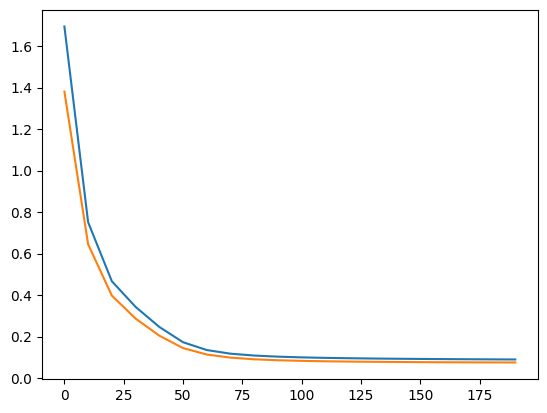

In [15]:
epochs, loss, test_loss = train_test(model, 200)

plot_convergence(epochs, loss, test_loss)

## Make Predictions

In [16]:
print(X_test.device)

with torch.inference_mode():
  model.eval()
  Y_logits = model(X_test)
  Y_preds = torch.softmax(Y_logits, dim=1).argmax(dim=1)

Y_preds[:10], y_test[:10]

cuda:0


(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

In [17]:
import requests
from pathlib import Path

# download the helper function
if Path("plotdecisionboudaries.py").is_file():
  print("exists")
else:
  print("Downloading...")
  request = requests.get("https://raw.githubusercontent.com/ShreyaAN10/LearnDeepLearning/main/plotdecisionboundaries.py")
  with open("plotdecisionboundaries.py", "wb") as f:
    f.write(request.content)

from plotdecisionboundaries import plot_decision_boundaries

Downloading...


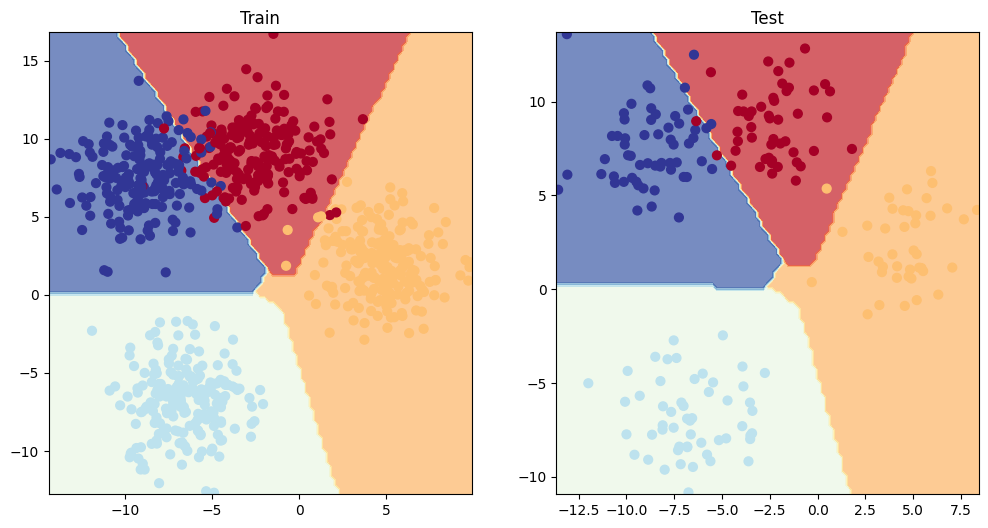

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundaries(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundaries(model, X_test, y_test)